In [1]:
import pystac

In [2]:
items = pystac.ItemCollection.from_file("search.json")

In [3]:
assets = items[-1].assets 

In [5]:
visual_href = assets["visual"].href

In [6]:
import rioxarray

In [9]:
visual = rioxarray.open_rasterio(visual_href, overview_level=2)

In [10]:
visual

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [11]:
visual = visual.load()

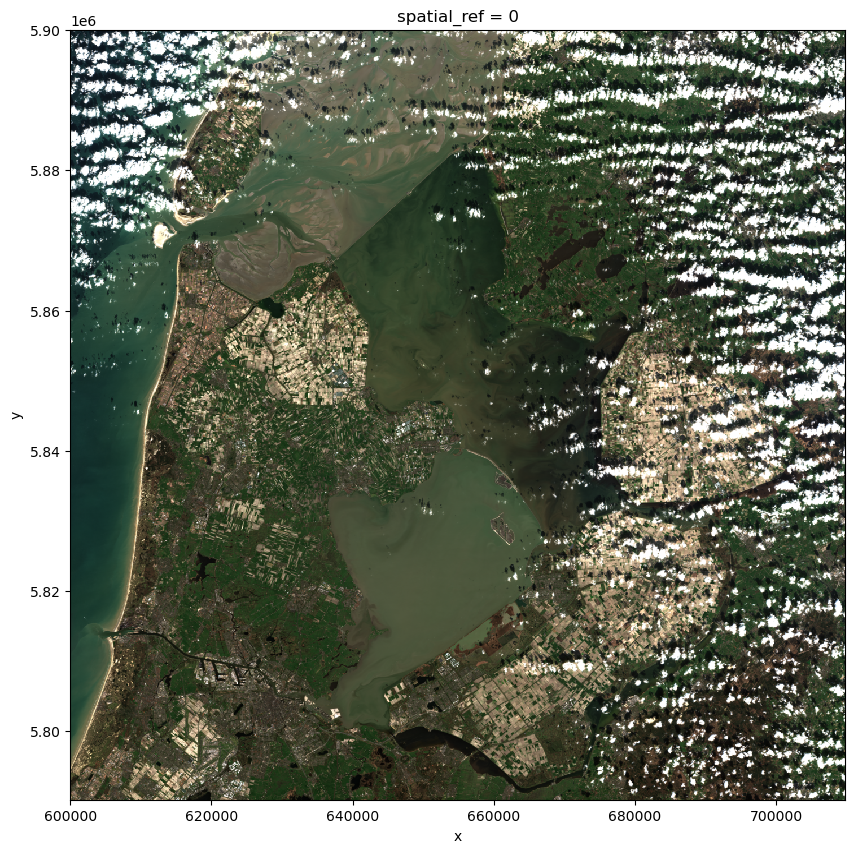

In [27]:
visual.plot.imshow(figsize=(10,10))

In [19]:
%%time
median = visual.rolling(x=7, y=7).median()

CPU times: user 15.6 s, sys: 3.2 s, total: 18.8 s
Wall time: 19.6 s


In [24]:
median

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., 41., 43., 44.],
        [nan, nan, nan, ..., 41., 43., 44.],
        [nan, nan, nan, ..., 42., 43., 44.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., 62., 63., 65.],
        [nan, nan, nan, ..., 62., 63., 65.],
        [nan, nan, nan, ..., 63., 64., 66.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., 32., 35., 37.],
        [nan, nan, nan, ..., 32., 35., 37.],
        [nan, nan, nan, ..., 33., 35., 37.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

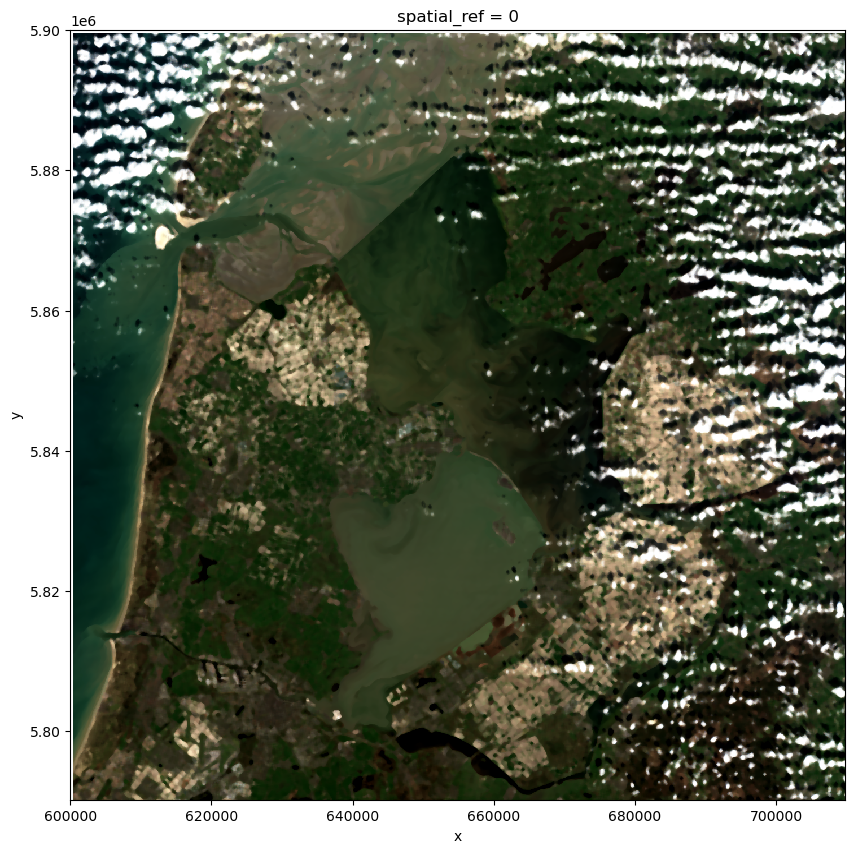

In [28]:
median.plot.imshow(robust=True, figsize=(10,10))

In [29]:
visual = rioxarray.open_rasterio(visual_href, overview_level=2, chunks=(3, 500, 500))

In [30]:
visual

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
dask.array<open_rasterio-c8260d663d293f4b9b57642c4063ebfd<this-array>, shape=(3, 1373, 1373), dtype=uint8, chunksize=(3, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [31]:
visual = visual.persist(scheduler="threads", num_workers=4)

In [32]:
visual

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
dask.array<open_rasterio-c8260d663d293f4b9b57642c4063ebfd<this-array>, shape=(3, 1373, 1373), dtype=uint8, chunksize=(3, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [33]:
%%time
median = visual.rolling(x=7, y=7).median()

CPU times: user 20.6 ms, sys: 3.71 ms, total: 24.3 ms
Wall time: 25.2 ms


In [34]:
import dask

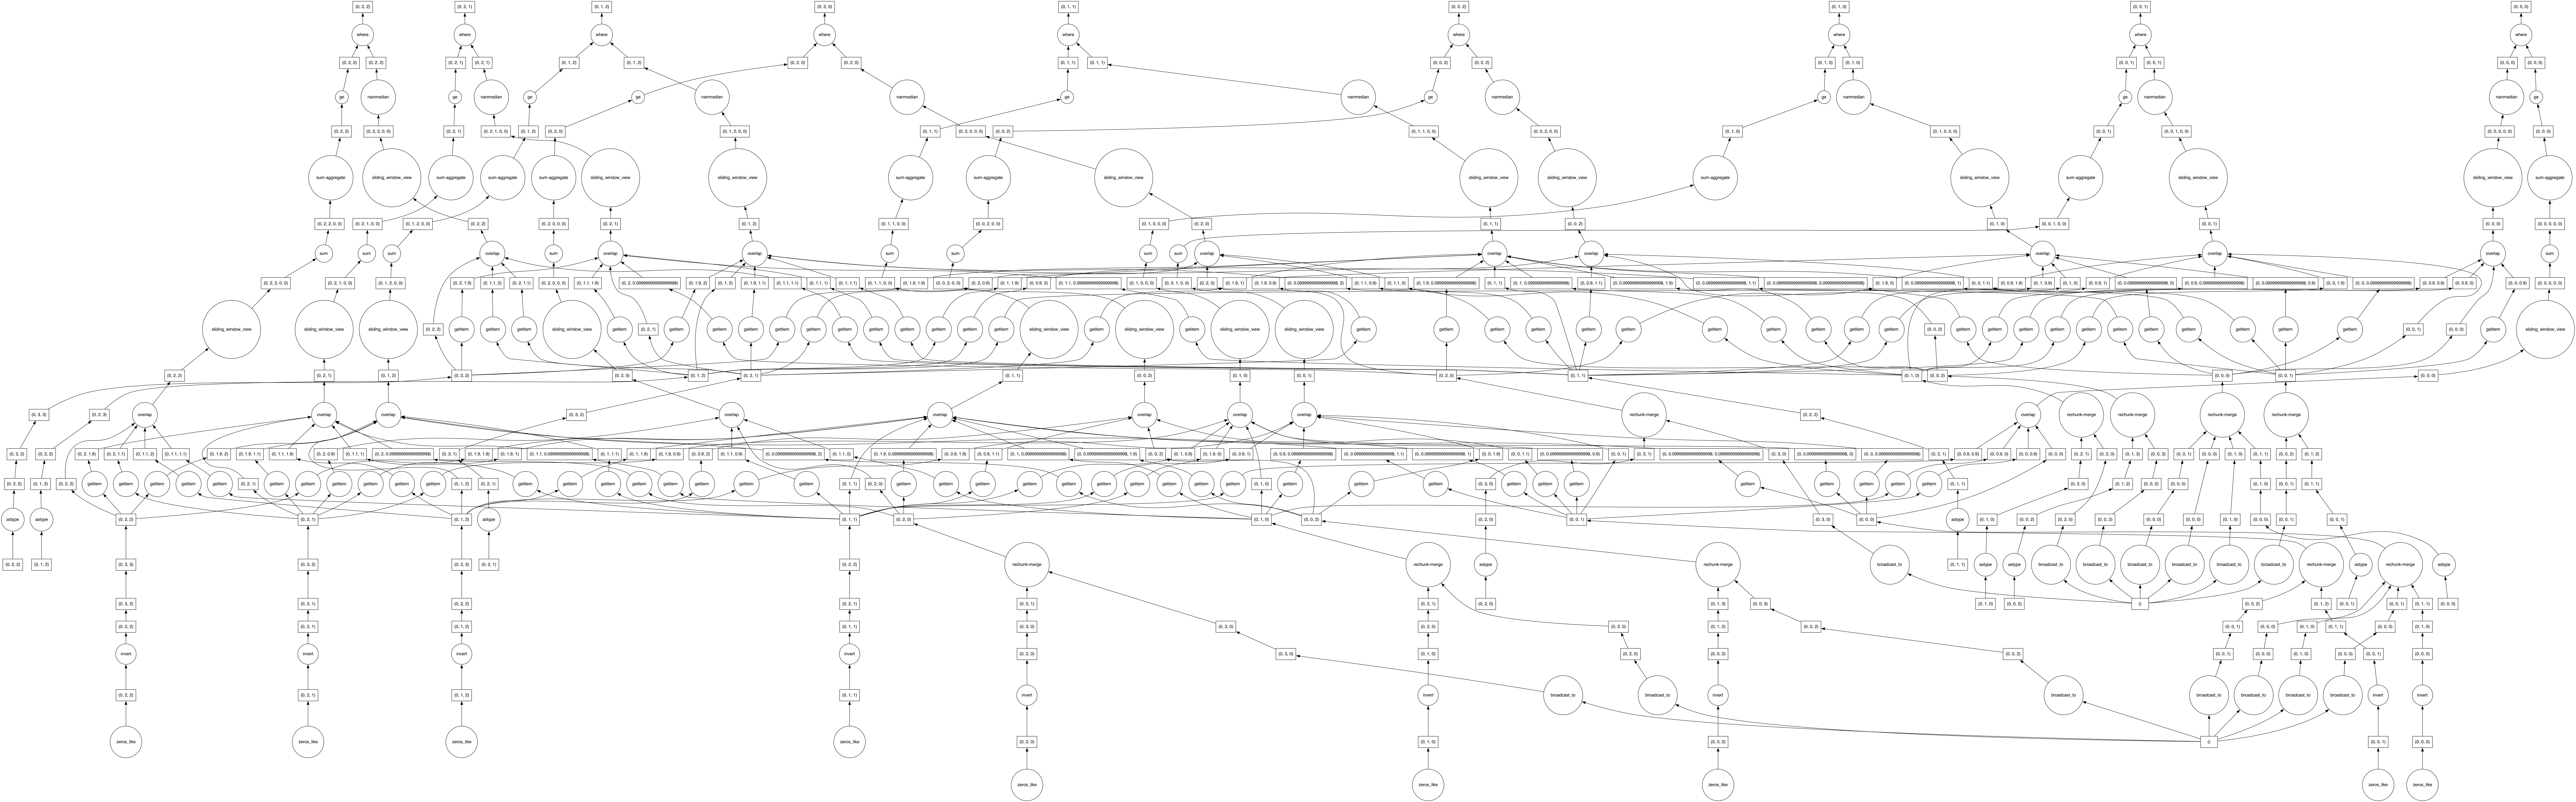

In [35]:
dask.visualize(median)

In [36]:
%%time
median = median.persist(scheduler="threads", num_workers=4)

CPU times: user 19.1 s, sys: 3.2 s, total: 22.3 s
Wall time: 6.61 s
